In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualisation

In [40]:
house_data= pd.read_csv('housing.csv')
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


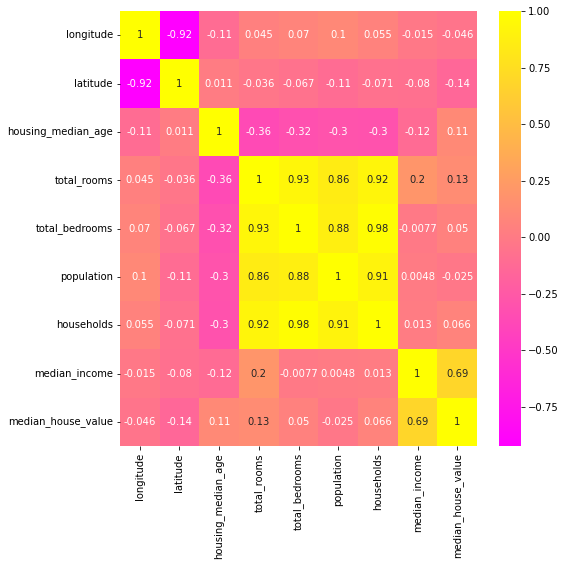

In [42]:
#correlation
plt.figure(figsize=(8,8))
sns.heatmap(house_data.corr(), annot=True, cmap="spring")
plt.show()

<Figure size 1080x576 with 0 Axes>

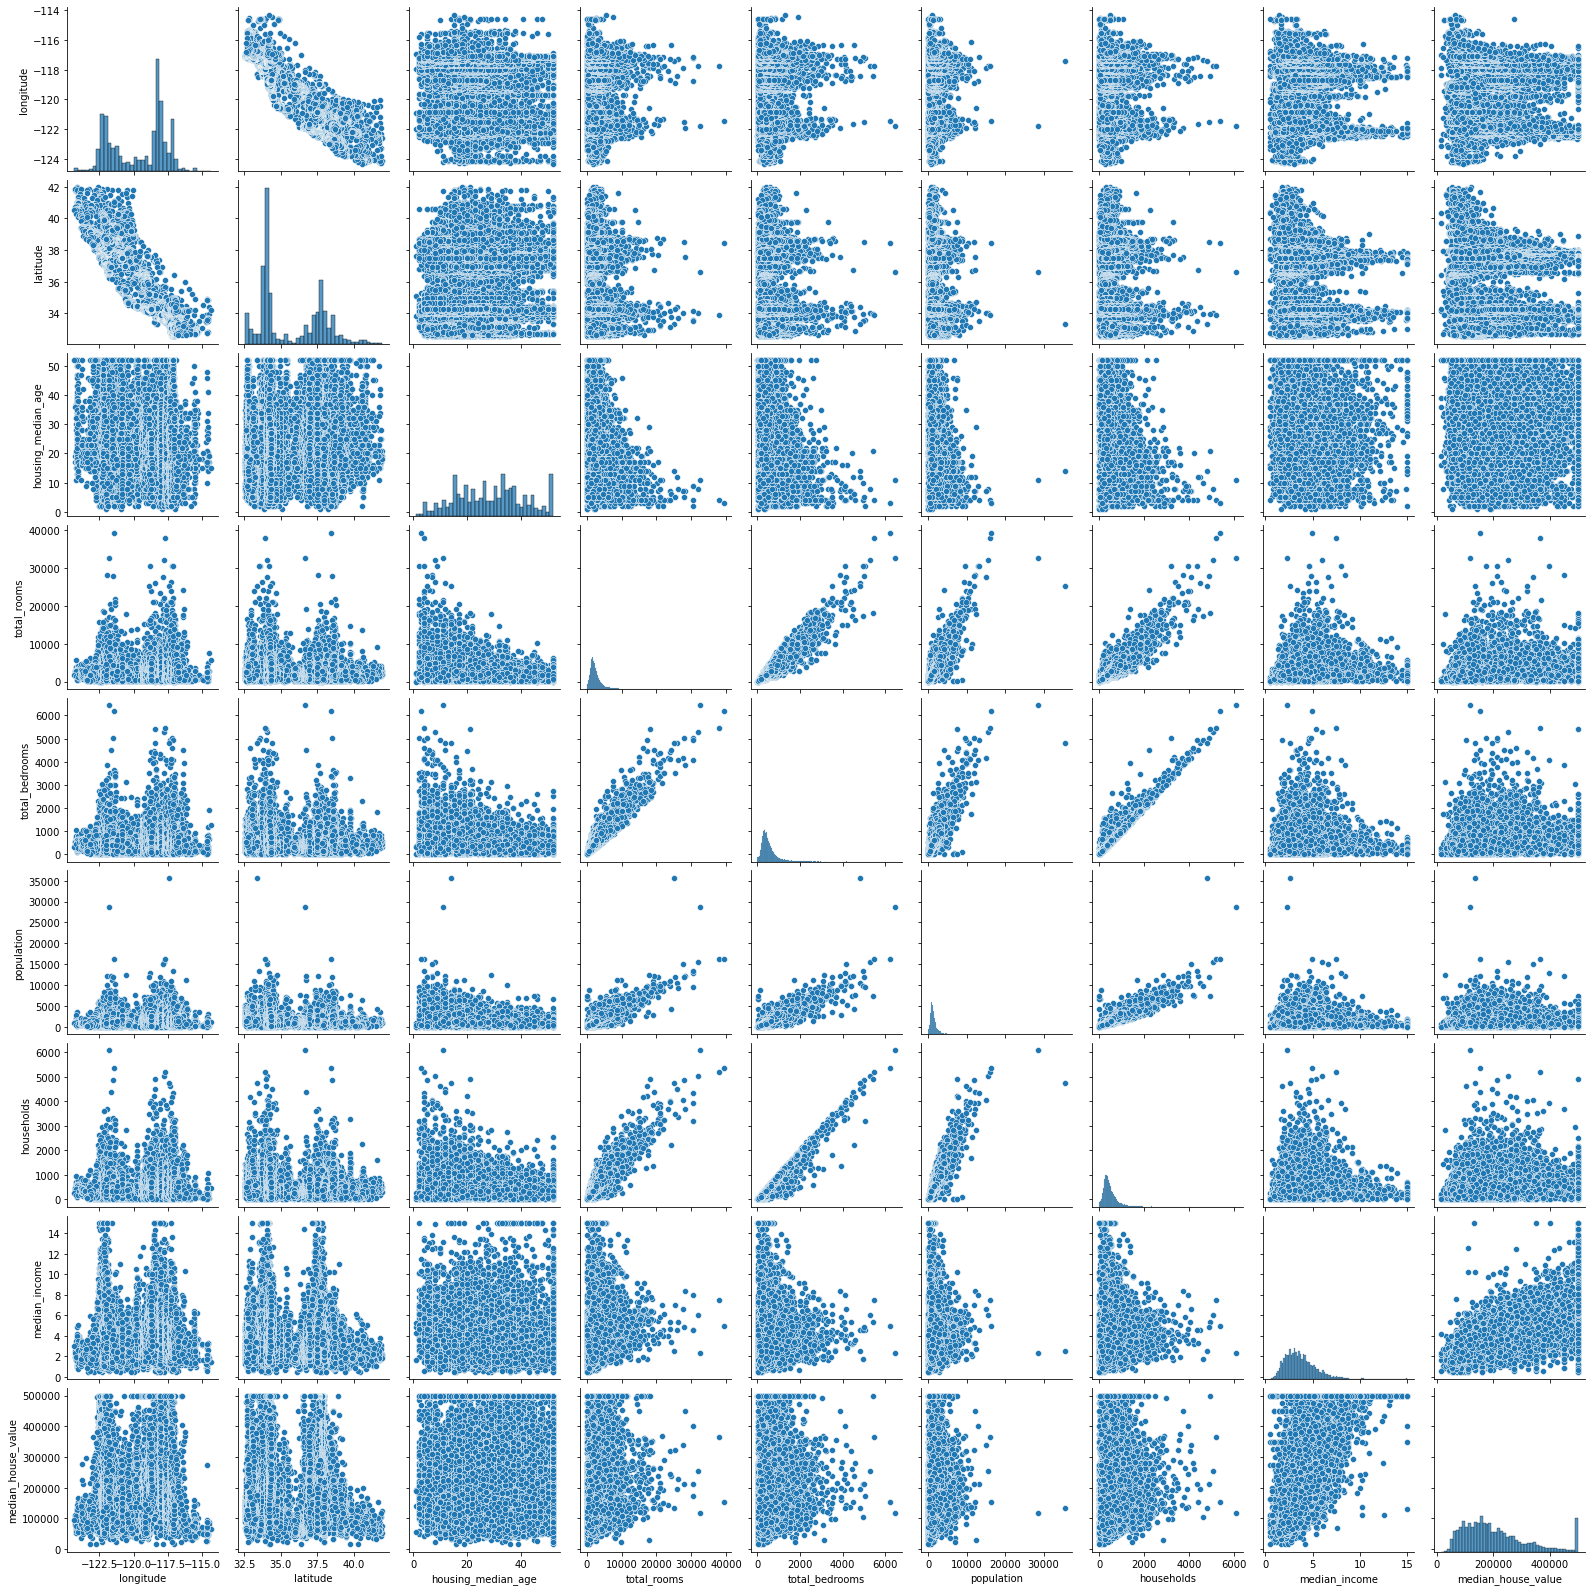

In [43]:
plt.figure(figsize=(15,8))
sns.pairplot(house_data)

## Data Manipulation

## Checking for null values

In [44]:
house_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

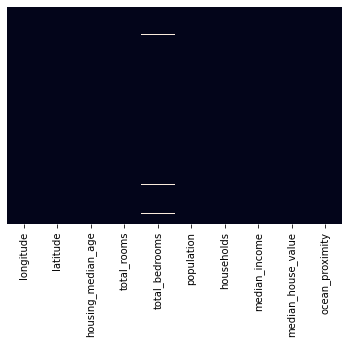

In [45]:
sns.heatmap(house_data.isnull(), yticklabels=False, cbar=False)

In [46]:
# % of null values of total bedrooms
(house_data['total_bedrooms'].isna().sum()/ len(house_data['total_bedrooms']))*100

1.002906976744186

In [47]:
import os
os.path.abspath("")

'C:\\Users\\iqfat'

## Filling na values

In [48]:
house_data['total_bedrooms'].mean()

537.8705525375618

In [49]:
house_data['total_bedrooms'].fillna(house_data['total_bedrooms'].mean(), inplace=True)

In [50]:
##verify the absence of null values
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
house_data['total_bedrooms'].isna().sum()

0

<AxesSubplot:>

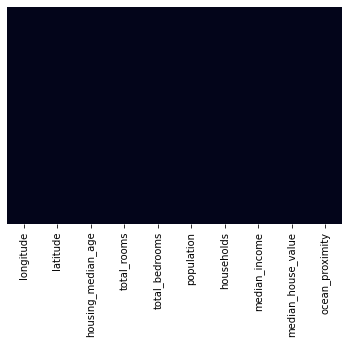

In [52]:
sns.heatmap(house_data.isnull(), yticklabels=False, cbar=False)

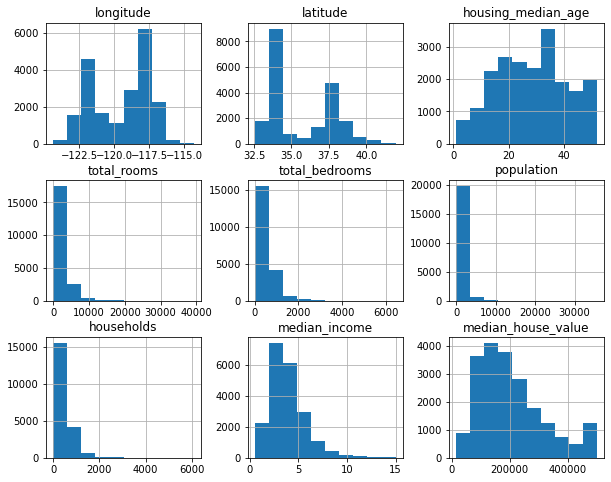

In [53]:
house_data.hist(figsize=(10,8))
plt.show()

Since the distribution curve for the variables total_rooms, total_bedrooms, population, households are heavily skewed to the **right**, we take the logarithm of these variables to get a Gaussian curve. 

In [54]:
house_data['total_rooms']=np.log(house_data['total_rooms']+1)
house_data['total_bedrooms']=np.log(house_data['total_bedrooms']+1)
house_data['population']=np.log(house_data['population']+1)
house_data['households']=np.log(house_data['households']+1)

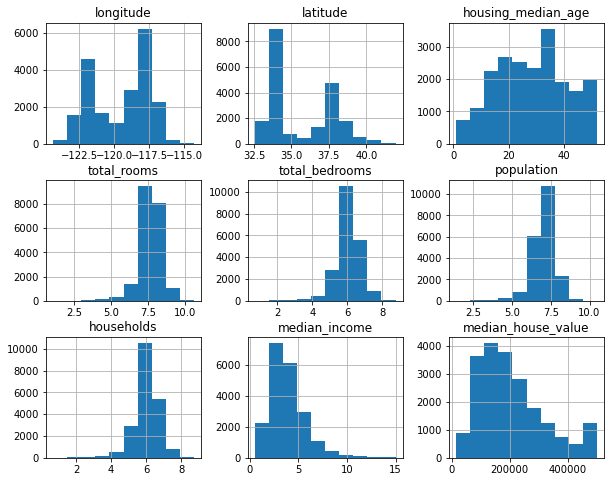

In [55]:
house_data.hist(figsize=(10,8))
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

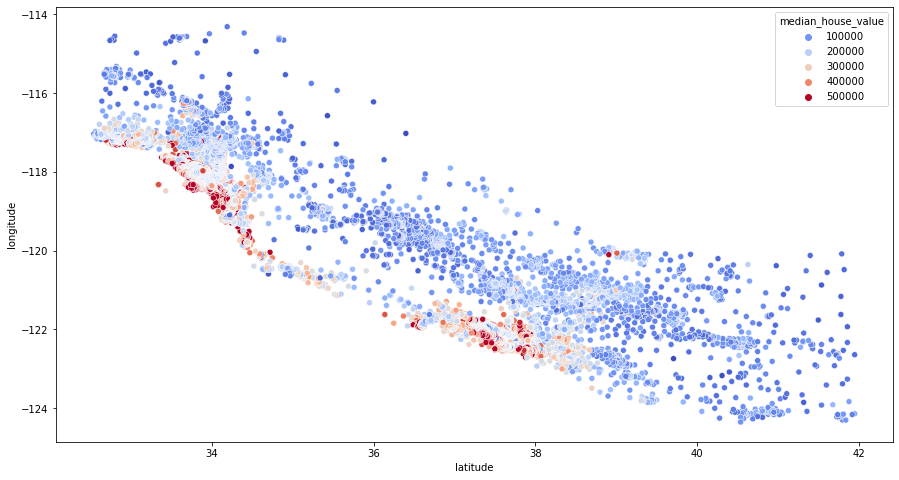

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=house_data, hue="median_house_value", palette="coolwarm")

The more red the points are the more expensive the house is, while the more blue the points are the less expensive the house is

## Converting categorical values to numerical

In [57]:
house_data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [58]:
pd.get_dummies(house_data['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


Now we add these variables into our original dataset while also dropping the variable ocean_proximity

In [59]:
house_data=house_data.join(pd.get_dummies(house_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

In [60]:
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


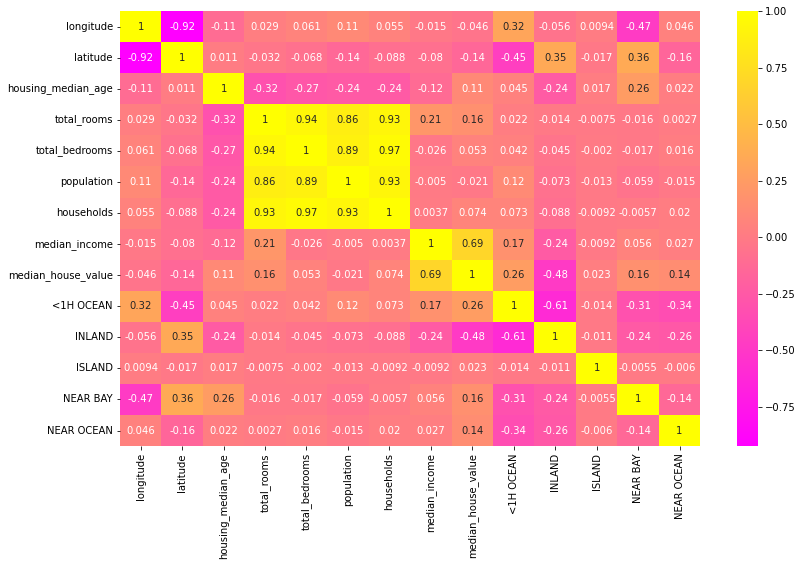

In [61]:
plt.figure(figsize=(13,8))
sns.heatmap(house_data.corr(), annot=True, cmap="spring")
plt.show()

It can be seen from the correlation map that when the house is inland the price iis extremely low, while the price is fairly high if the house is less than 1 hour away from the ocean.

## Data Modelling

## Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#Seperating Dependent and Independent variables
x=house_data.drop(['median_house_value'], axis=1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0,1,0,0,0


In [65]:
y=house_data['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [66]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [67]:
reg.fit(x_train, y_train)

LinearRegression()

In [68]:
predict=reg.predict(x_test)

In [77]:
reg.score(x_test, y_test)

0.6513375308229296

Here we have obtained an accuracy of **65.13%**

## Random Forest 

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predict_rfr=rfr.predict(x_test)

In [72]:
rfr.score(x_test, y_test)

0.8190726203544498

Here we have obtained an accuracy of **81.99%**

## Check which model performs best- R2 Score

In [73]:
models_result = []
from sklearn.metrics import r2_score

In [74]:
models_result.append(["RandomForest",r2_score(y_test, predict_rfr)])
models_result.append(["LinearRegression",r2_score(y_test, predict)])

In [75]:
models_result

[['RandomForest', 0.8190726203544498],
 ['LinearRegression', 0.6513375308229296]]

In [76]:
models = pd.DataFrame(models_result, columns = ["model", "r2_score"])
models = models.sort_values(["r2_score"], ascending = False)
models

,model,r2_score
0,RandomForest,0.819073
1,LinearRegression,0.651338


Hence we can conclude that the Random Forest statistical technique proved to be more useful in making predictions for the housing prices.